### **Assignment: Exploratory Data Analysis (EDA) on the Titanic Dataset**
Submitted By: Rezaul Islam

---



***Task 1: Data Loading and Initial Inspection***

In [21]:
# Step 1: Import necessary libraries
import pandas as pd

In [22]:
# Step 2: Load the dataset directly from the given URL
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv"
df = pd.read_csv(url)

In [23]:
# Step 3: Display the first 5 rows of the dataset
print("----- First 5 Rows of the Dataset -----")
print(df.head())




----- First 5 Rows of the Dataset -----
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0       

In [24]:
# Step 4: Check data types and non-null counts
print("\n----- Dataset Info -----")
df.info()




----- Dataset Info -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
# Step 5: Get descriptive statistics of numerical columns
print("\n----- Descriptive Statistics -----")
print(df.describe())




----- Descriptive Statistics -----
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [26]:
# Step 6: Identify total number of missing values per column
print("\n----- Missing Values in Each Column -----")
print(df.isnull().sum())


----- Missing Values in Each Column -----
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


***Task 2: Handling Missing Values***

In [27]:
# 1️⃣ Cabin: Calculate percentage of missing values

missing_cabin_percent = df['Cabin'].isnull().mean() * 100
print(f"Percentage of missing values in 'Cabin': {missing_cabin_percent:.2f}%")

# Decision: If too many values are missing, drop the column
if missing_cabin_percent > 50:
    print("More than 50% of the Cabin data is missing — dropping the 'Cabin' column.")
    df.drop('Cabin', axis=1, inplace=True)
else:
    print("Cabin column retained for analysis.")

Percentage of missing values in 'Cabin': 77.10%
More than 50% of the Cabin data is missing — dropping the 'Cabin' column.


In [28]:
# 2️⃣ Embarked: Handle missing values using the mode

# Find the most frequent port of embarkation (the mode)
most_frequent_embarked = df['Embarked'].mode()[0]
print(f"\nMost frequent port of embarkation (mode): {most_frequent_embarked}")

# Impute missing values in 'Embarked' with the mode
df['Embarked'] = df['Embarked'].fillna(most_frequent_embarked)

# Verify if any missing values remain in 'Embarked'
print(f"Missing values in 'Embarked' after imputation: {df['Embarked'].isnull().sum()}")



Most frequent port of embarkation (mode): S
Missing values in 'Embarked' after imputation: 0


In [31]:
# 3️⃣ Age: Impute missing values with the median age

# Calculate the median age
median_age = df['Age'].median()
print(f"\nMedian age: {median_age}")

# Impute missing values in 'Age' with the median
df['Age'] = df['Age'].fillna(median_age)

# Verify if missing values remain after imputation
print(f"Missing values in 'Age' after imputation: {df['Age'].isnull().sum()}")



Median age: 28.0
Missing values in 'Age' after imputation: 0


In [30]:
# Final check of missing values in all columns
print("\n----- Missing Values After Cleaning -----")
print(df.isnull().sum())


----- Missing Values After Cleaning -----
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


***Task 3: Univariate Analysis***

In [35]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# Set visualization style
sns.set(style="whitegrid", palette="Set2")


Overall Survival Rate: 38.38%


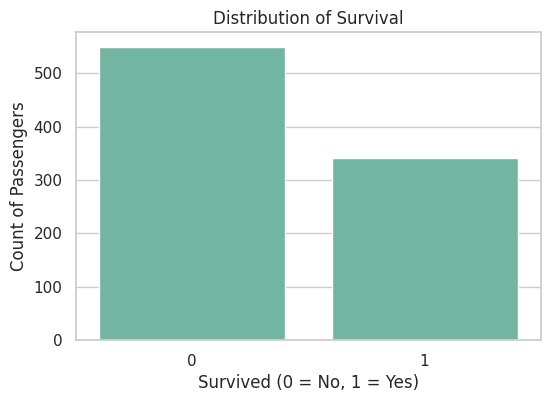

In [37]:
# 1️⃣ Survival Rate
# Calculate overall survival rate (percentage of passengers who survived)
survival_rate = df['Survived'].mean() * 100
print(f"Overall Survival Rate: {survival_rate:.2f}%")

# Visualize the distribution of 'Survived'
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=df)
plt.title('Distribution of Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count of Passengers')
plt.show()

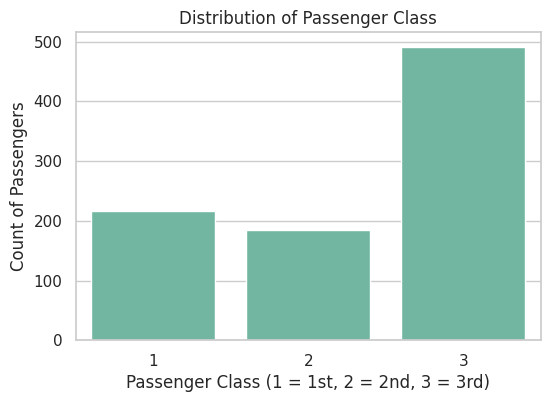

Passenger class with the most passengers: Class 3


In [38]:
# 2️⃣ Passenger Class (Pclass)
# Visualize distribution of passenger classes
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', data=df)
plt.title('Distribution of Passenger Class')
plt.xlabel('Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)')
plt.ylabel('Count of Passengers')
plt.show()

# Identify which class had the most passengers
most_common_class = df['Pclass'].mode()[0]
print(f"Passenger class with the most passengers: Class {most_common_class}")

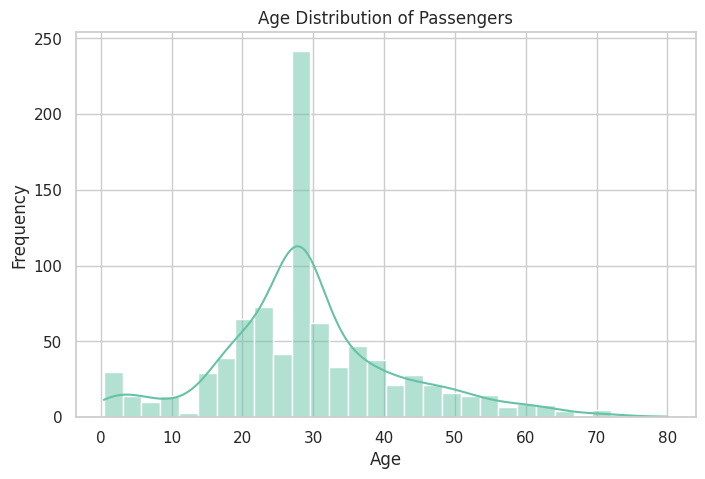

In [39]:
# 3️⃣ Age Distribution
# Plot a histogram to visualize the distribution of passenger ages
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

***Task 4: Bivariate and Multivariate Analysis***


In [49]:
sns.set(style="whitegrid", palette="Set3")


Crosstab of Survival by Sex:
Survived    0    1
Sex               
female     81  233
male      468  109


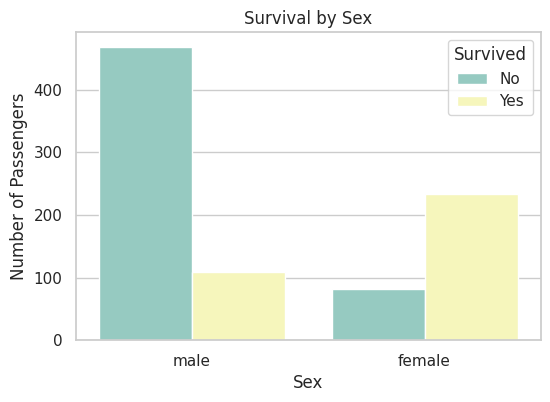


Survival Rate by Sex (%):
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

Observation: Females had a significantly higher survival rate than males.


In [50]:
# 1️⃣ Survival by Sex
# Create a crosstab to show survivors and non-survivors grouped by Sex
sex_crosstab = pd.crosstab(df['Sex'], df['Survived'])
print("\nCrosstab of Survival by Sex:")
print(sex_crosstab)

# Visualize the relationship using a grouped count plot
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# Calculate survival rates by sex
survival_by_sex = df.groupby('Sex')['Survived'].mean() * 100
print("\nSurvival Rate by Sex (%):")
print(survival_by_sex)

# Observation
print("\nObservation: Females had a significantly higher survival rate than males.")


Survival Rate by Passenger Class (%):
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


/tmp/ipython-input-2509529191.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df, ci=None)


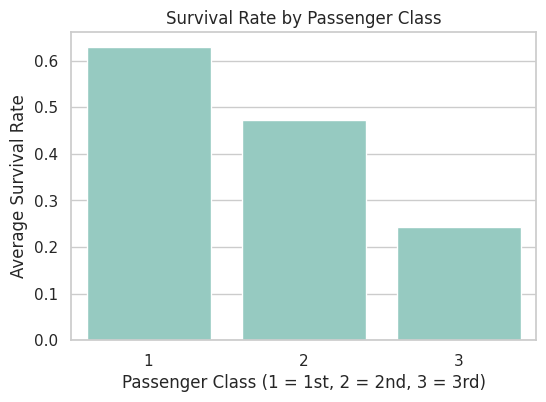


Observation: Passengers in higher classes (especially 1st class) had a higher chance of survival.


In [52]:
# 2️⃣ Survival by Passenger Class (Pclass)
# Calculate survival rate for each class
survival_by_class = df.groupby('Pclass')['Survived'].mean() * 100
print("\nSurvival Rate by Passenger Class (%):")
print(survival_by_class)

# Visualize survival rate by class
plt.figure(figsize=(6,4))
sns.barplot(x='Pclass', y='Survived', data=df, ci=None)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)')
plt.ylabel('Average Survival Rate')
plt.show()

# Observation
print("\nObservation: Passengers in higher classes (especially 1st class) had a higher chance of survival.")


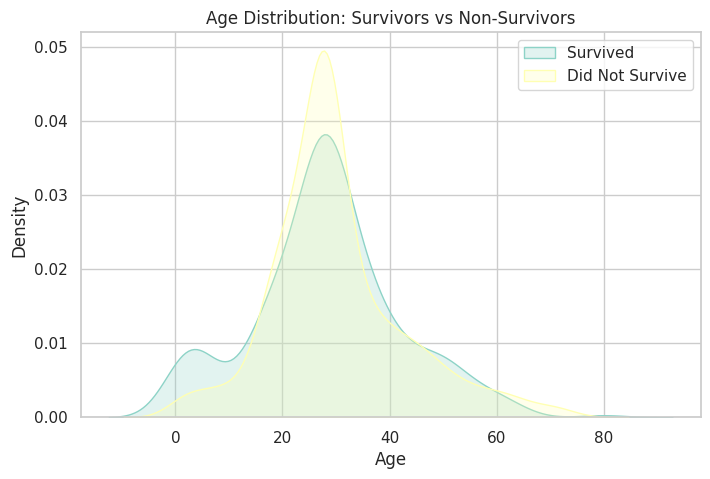


Observation: Children (below ~15 years) had slightly higher survival chances, while middle-aged and elderly passengers had lower survival probabilities.


In [53]:
# 3️⃣ Survival by Age
# Compare age distribution of survivors vs non-survivors
plt.figure(figsize=(8,5))
sns.kdeplot(data=df[df['Survived']==1]['Age'], label='Survived', fill=True)
sns.kdeplot(data=df[df['Survived']==0]['Age'], label='Did Not Survive', fill=True)
plt.title('Age Distribution: Survivors vs Non-Survivors')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

# Observation
print("\nObservation: Children (below ~15 years) had slightly higher survival chances, "
      "while middle-aged and elderly passengers had lower survival probabilities.")



Survival Rate by Port of Embarkation (%):
Embarked
C    55.357143
Q    38.961039
S    33.900929
Name: Survived, dtype: float64


/tmp/ipython-input-2251053689.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Embarked', y='Survived', data=df, ci=None)


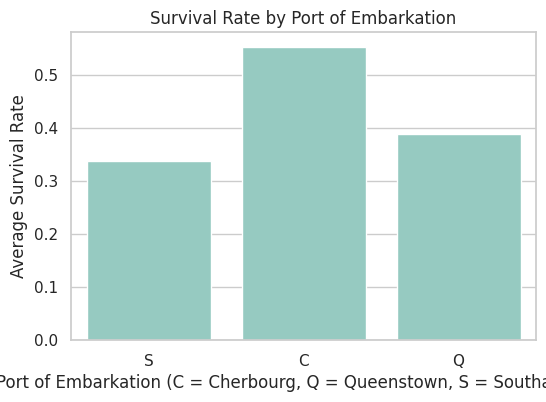


Observation: Passengers who embarked at Cherbourg (C) had a higher survival rate compared to others.


In [54]:
# 4️⃣ Survival by Port of Embarkation (Embarked)
# Calculate survival rate for each embarkation port
survival_by_port = df.groupby('Embarked')['Survived'].mean() * 100
print("\nSurvival Rate by Port of Embarkation (%):")
print(survival_by_port)

# Visualize survival rate by port
plt.figure(figsize=(6,4))
sns.barplot(x='Embarked', y='Survived', data=df, ci=None)
plt.title('Survival Rate by Port of Embarkation')
plt.xlabel('Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)')
plt.ylabel('Average Survival Rate')
plt.show()

# Observation
print("\nObservation: Passengers who embarked at Cherbourg (C) had a higher survival rate compared to others.")

***Task 5: Conclusion and Insights***

Based on the Exploratory Data Analysis (EDA) of the Titanic dataset, several key patterns emerged regarding passenger survival. **[Gender]** was the most significant factor — females had a far higher survival rate than males, reflecting the “women and children first” evacuation policy. Passenger class **[Pclass]** also strongly influenced survival, with first-class passengers having the highest survival rates and third-class the lowest, indicating socioeconomic advantage played a major role. Additionally, **[Age]** showed that children were more likely to survive than adults or the elderly. Overall, **[Sex]**, **[Pclass]**, and **[Age]** appear to be the strongest predictors of survival on the Titanic.